# Lesson: Clustering
---
Created by Varsha Konda for AI4ALL UW 2020 Draft 5/28/20

In [126]:
# import sys
# !conda install --yes --prefix {sys.prefix} -c plotly plotly=4.7.1

### Activity

Let's explore K-Means clustering using scikit-learn. For this example, we will use a data set of hand-written digits. We begin by loading the data set, which is a very low-resolution (8x8 pixels) version of the MNIST data set.

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<function matplotlib.pyplot.show>

<Figure size 432x288 with 0 Axes>

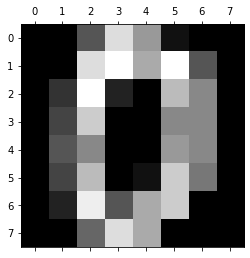

In [127]:
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
import numpy as np

# Load the digits data set
digits = datasets.load_digits()

# now we'll just show you how to visualize one example digit image, 
# you may find this useful in debugging code in later notebooks.

# Visualize one example digit image 
plt.gray() 

# print the intensities of this image
print(digits.images[0])

# you can also visualize it as an image.
# looking at just the first digit image in the dataset
plt.matshow(digits.images[0]) 
plt.show

# Now show us how you visualize the 25th digit image in the dataset

In [128]:
# put your code here.

> Each data sample is an 8x8 array of gray-scale values and will be the input values for our clusters. The target values (those are the labels indicating what digit was drawn in the image) are stored in a list of integers, each representing the digits 0-9.

In [129]:
# Extract the input data, force values to be between 0.0 and 1.0
X_digits = digits.data / digits.data.max()

# X_digits is an array containing multiple arrays. Here each array is a linearized version of the 8x8 matrix (image) corresponding to each digit.
# First element of X_digits: 
X_digits[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

**Question**: Why do we force the values to be between 0 and 1?

In [130]:
# Extract the "ground truth" labels for each sample (each a digit between 0-9)
# i.e. the number each image actually represents. 
# These are the "labels" for those training examples.
y_digits = digits.target

# Problem: Print the target values so we can make sure we have accessed the correct data


# **Reshaping arrays**
We're going to take a tiny detour here because it is important to understand **features**

**Question**: Can you tell us how many training examples are in this dataset?

**Question**: Can you produce code to get that number?



In [131]:
# how do you get the number of examples in the training set?  

**Question**: How many "**features**" will we be training on in this dataset? Can you produce code to get that number?

In [132]:
# here you calculate the number of features in the training set

**Question**: In machine learning, in many problems, computation time for training is said to "grow with the dimension of feature space". What dimension is our feature space here?

**Extra coding bonus question**: Can you grow the dimension of feature space by 8? Put your results in a new ndarray so that you can go back and later cluster the original digits.data (you may find this tutorial helpful: https://machinelearningmastery.com/index-slice-reshape-numpy-arrays-machine-learning-python/)

Big hint: you will start out by "padding" the feature array of each indexed data image. (use the np.pad function).

THEN... can you also add those 8 features to be represented in the image data?

This is a hard problem! don't worry if you cannot get this challenge!!



In [133]:
#print(digits.images.shape)
#print(digits.data.shape)


# **CLUSTERING, finally! **
> Now that we understand our what our data looks like let's get to clustering it.

In [134]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# n_clusters specifies what value of k to use (how many clusters)
n_clusters = 1

# Create our KMeans classifier
kMeans_classifier = KMeans(n_clusters=n_clusters)

In [135]:
# Each cluster is indexed from 0 to n_clusters. For each element in X_digits a cluster index is assigned
# The corresponding cluster index for each element are stored in y_pred
y_pred = kMeans_classifier.fit_predict(X_digits)
# Note that the classifier does not know which number each image array corresponds to (unlabelled dataset)

> Now we want to **visualize** the clustered groups

In [139]:
# How would you visualize the results of the clustering you obtained above?
# try changing the number of clusters to validate your code
# try not to copy the way we did it below.

### Exercises

> 1. Write code to go through the output from the classifier and pass the required arguments to the visualize_clusters function below to replicate the graph above

In [136]:
import plotly.express as px

# function to visualize clustered data
# x_axis: array of values with x coordinates
# y_axis: array of values with y coordinates
# count: number of times given (x,y) repeats
def visualize_clusters(x_axis, y_axis, count):
    fig = px.scatter(x=x_axis, y=y_axis,size=count)
    fig.update_layout(
    xaxis=dict(title="Digit", tickmode="linear"),
    yaxis=dict(title="Cluster index", tickmode="linear")
    )
    fig.show()


In [137]:
l  = [] 

# Making an array containing tuples of actual digit and predicted digit for each image array
for i in range(0, len(X_digits)):
    l.append([y_digits[i], y_pred[i]])
l.sort()



# No. of digits distinct digits we have in the data set
n_digits = 10

# An array containing the actual digit each image represents
x = []

# An array containing the predicted cluster index for each image
y = []

# The number of times each (x,y) coordinate is repeated
count = []

# Your function goes below 


for i in range(0, n_digits):
    for j in range(0, n_clusters):
        c = 0
        for k in range(0, len(l)):
            c = c + (l[k][0] == i and l[k][1] == j)
        x.append(i)
        y.append(j)
        count.append(c)

visualize_clusters(x, y, count)

> 2. Go back to part in code where the number of clusters was set and change it to 5 instead of 10. Try to predict how the digits will be grouped when clustered. Run the rest of the code and observe what you get. Did your predictions match how the digits are clustered? 